In [10]:
%matplotlib inline
import pylab as plt
plt.style.use('fivethirtyeight')

import pandas as pd
%matplotlib inline

[link to the repo](https://github.com/Codecademy/datasets/tree/master/streeteasy)

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/Codecademy/datasets/master/streeteasy/streeteasy.csv')

In [6]:
df.head(5)

,rental_id,building_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,submarket,borough
0,1545,44518357,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,All Upper East Side,Manhattan
1,2472,94441623,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,All Downtown,Manhattan
2,10234,87632265,3000,3.0,1,1000,4,1.0,106,0,0,0,0,0,0,0,0,Astoria,Northwest Queens,Queens
3,2919,76909719,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,All Midtown,Manhattan
4,2790,92953520,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,All Downtown,Manhattan


In [7]:
df.shape

(5000, 20)

# 1. постройте гистограммы цен аренды для каждого `borough`. 
Напишите 1-3 пункта выводов

In [8]:
df['borough'].unique()

array(['Manhattan', 'Queens', 'Brooklyn'], dtype=object)

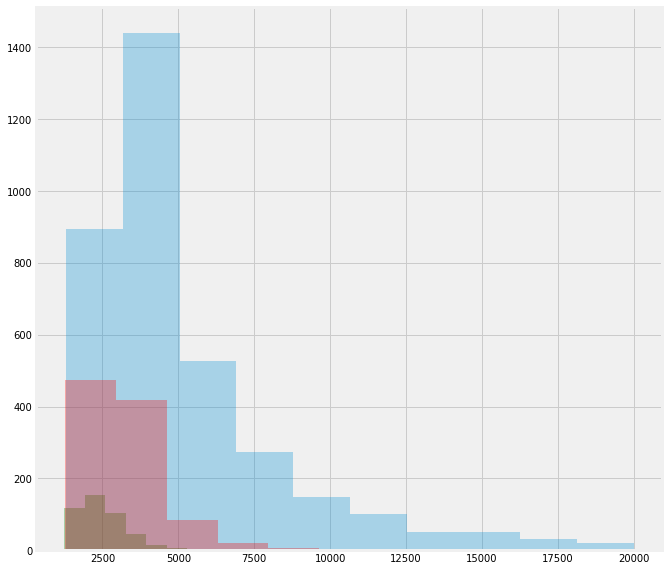

In [22]:
fig, axes = plt.subplots(figsize=(10, 10))
df[df['borough'] == 'Manhattan']['rent'].hist(bins=10, ax=axes, alpha=.3)
df[df['borough'] == 'Queens']['rent'].hist(bins=10, ax=axes, alpha=.3, color='green')
df[df['borough'] == 'Brooklyn']['rent'].hist(bins=10, ax=axes, alpha=.3, color='red')

In [ ]:
"""
1. В Квин меньше предложений чем в Бруклине, а в бруклине меньше чем в Манхеттане.
2. В Квин отсутствуют предложения большой стоимости, в отличии от Манхеттана и Бруклина.
"""

# 2. Можно ли сказать что Бруклин и Манхеттан принадлежат одной генеральной совокупности по ценам?
А по распределению комнат, туалетов, площади?

In [24]:
from scipy import stats

In [31]:
man = df[df['borough'] == 'Manhattan']
bru = df[df['borough'] == 'Brooklyn']
que = df[df['borough'] == 'Queens']

In [27]:
stats.ttest_ind(a=man['rent'], b=bru['rent'], equal_var=False)  # Нет

Ttest_indResult(statistic=24.74058092247841, pvalue=3.1621362878949304e-124)

In [28]:
stats.ttest_ind(a=man['bedrooms'], b=bru['bedrooms'], equal_var=False)  # Нет

Ttest_indResult(statistic=-6.55348586843446, pvalue=7.52147955687891e-11)

In [29]:
stats.ttest_ind(a=man['bathrooms'], b=bru['bathrooms'], equal_var=False)  # Нет

Ttest_indResult(statistic=7.322794742591573, pvalue=3.486499635271121e-13)

In [30]:
stats.ttest_ind(a=man['size_sqft'], b=bru['size_sqft'], equal_var=False)  # И снова нет :)

Ttest_indResult(statistic=2.9321484840141387, pvalue=0.00340154365068835)

# 3. Постройте матрицу корелляций для Квинс. Чем она отличается об Манхеттена
Напишите 2-5 пункта выводов

In [40]:
import seaborn as sns
import numpy as np

sns.set(style="white")

In [49]:
corr_que = que.corr()
corr_man = man.corr()

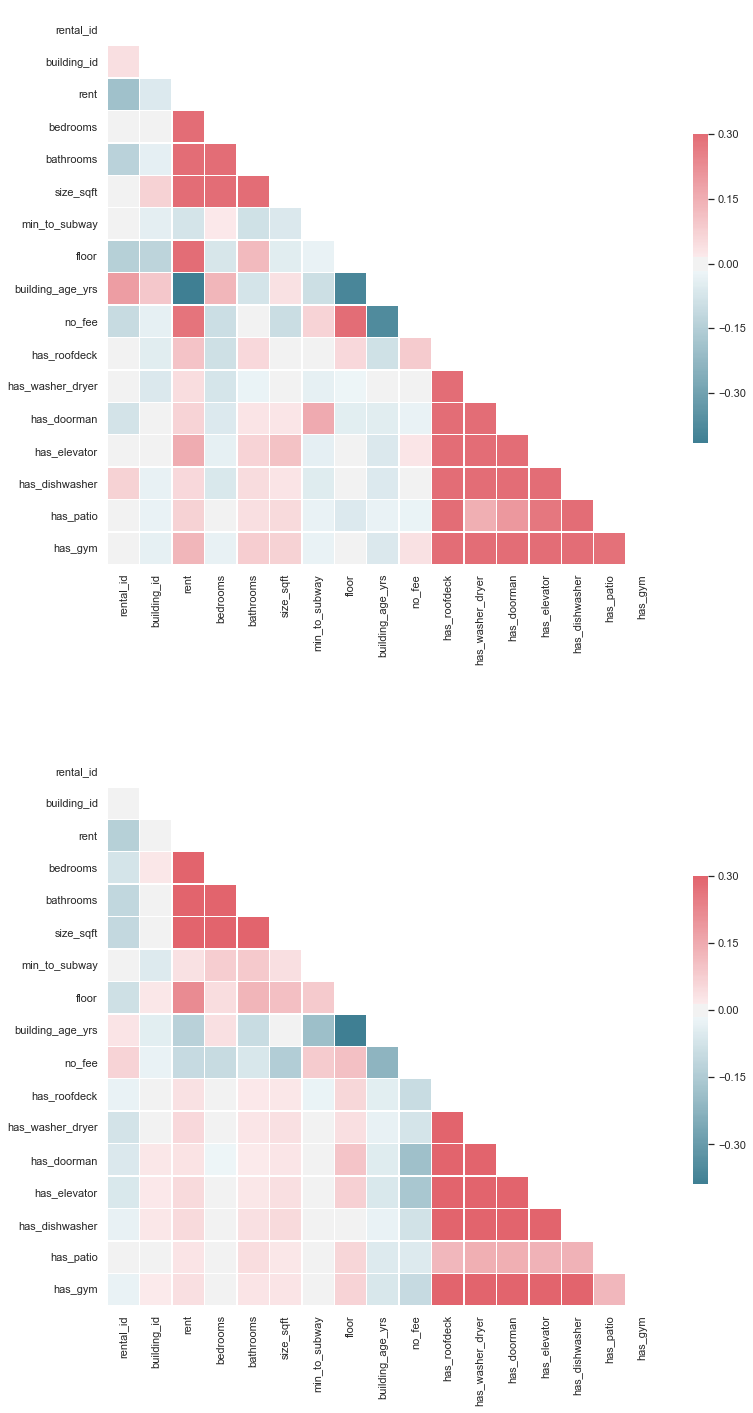

In [77]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
f, ax = plt.subplots(2, 1, figsize=(11, 25))

mask = np.zeros_like(corr_que, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_que, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=ax[0])

mask = np.zeros_like(corr_man, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_man, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=ax[1])

In [ ]:
"""
1. В Квинc большая корелляция c rent у building_age_yrs и no_fee. 
2. В Квинc большая корелляция c no_fee у building_age_yrs и floor.
3. В Квинc большая корелляция c has_patio у building_age_yrs и floor.
4. 
5. 
"""

# 4. Существует ли значительная корелляция между годом постройки здания и площадью квартиры, этажом, в Квинс?

In [35]:
que['building_age_yrs'].corr(que['floor'])  # Значительной корелляции нет, но она есть

-0.39145317518921674

# 5. Существует ли статистически значимая корелляция между ценой и `time_to_subway` на Манхеттене?
а в Квинс?

In [37]:
que['rent'].corr(que['min_to_subway'])  # Нет

-0.07654787891650004

In [39]:
man['rent'].corr(man['min_to_subway'])  # Нет

0.03516406710980702

# 6. Сгруппируйте и нормализуйте (переведите в %) данные по районам (neighborhood). 

Существует ли значимая линейная зависимость между % аренды с лифтом в здании и % patio (двор)